In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 

In [9]:
#csvからデータを読み込む
data_train = pd.read_csv('House Price train.csv')
data_test = pd.read_csv('House Price test.csv')
data_train.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [10]:
#相関関数を表示
a = data_train.corr()
data_train.corr().tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
Street_Grvl,-0.005950,-0.046983,-0.007473,-0.028865,0.015643,0.038487,0.050524,-0.015485,-0.035229,-0.023082,...,-0.003766,-0.003766,-0.019397,-0.002915,-0.006539,1.000000,-1.000000,0.001682,-0.001682,-0.041036
Street_Pave,0.005950,0.046983,0.007473,0.028865,-0.015643,-0.038487,-0.050524,0.015485,0.035229,0.023082,...,0.003766,0.003766,0.019397,0.002915,0.006539,-1.000000,1.000000,-0.001682,0.001682,0.041036
Utilities_AllPub,-0.012287,0.020818,0.003046,-0.004288,0.019100,-0.049913,0.021467,-0.103380,0.012639,0.009407,...,0.001535,0.001535,0.007905,0.001188,0.067078,0.001682,-0.001682,1.000000,-1.000000,0.014314
Utilities_NoSeWa,0.012287,-0.020818,-0.003046,0.004288,-0.019100,0.049913,-0.021467,0.103380,-0.012639,-0.009407,...,-0.001535,-0.001535,-0.007905,-0.001188,-0.067078,-0.001682,0.001682,-1.000000,1.000000,-0.014314
SalePrice,0.605852,0.319334,0.044584,0.168213,0.386420,-0.011378,0.227122,-0.016844,0.214479,-0.128578,...,0.014371,-0.027475,0.357509,-0.034895,-0.242598,-0.041036,0.041036,0.014314,-0.014314,1.000000


In [12]:
b = a[a.SalePrice> 0.7]
b
#相関関数が０．７以上のものを選ぶ

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
GrLivArea,0.566024,0.687501,0.020643,0.521270,0.208171,-0.009640,0.034836,-0.018918,0.240257,0.009113,...,0.017268,-0.022348,0.168368,-0.036522,-0.121102,-0.044121,0.044121,0.008545,-0.008545,0.708624
OverallQual,0.476224,0.295493,0.030371,0.101676,0.239666,-0.059119,0.111098,-0.040150,0.308159,-0.113937,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.058823,0.058823,0.001881,-0.001881,0.790982
SalePrice,0.605852,0.319334,0.044584,0.168213,0.386420,-0.011378,0.227122,-0.016844,0.214479,-0.128578,...,0.014371,-0.027475,0.357509,-0.034895,-0.242598,-0.041036,0.041036,0.014314,-0.014314,1.000000


In [13]:
c = a[a.SalePrice < -0.7]
c
#相関関数が－0.7以下のものを選ぶ
#そのような要素は存在しなかった

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice


In [9]:
#相関関数が高かったものを取り出してnp.arrayの形に直す
X = data_train.loc[:, ['GrLivArea', 'OverallQual'] ].values
#目的変数に対しても同じ処理を行う
y = data_train.loc[:, ['SalePrice']].values

In [10]:
#テスト用と学習用に分ける
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#学習を行う
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(A_train, B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#切片と係数を求める
print(lr.intercept_)
print(lr.coef_)
#変数が足りない可能性がある
#OverallQualは寄与しているが、GrLivAreaはほとんど関係ない可能性がある。
#標準化していないため一概には言えない

[-104362.61223639]
[[    61.36857857  31506.71506056]]


In [13]:
#決定係数を出力
#少し過学習気味である
print("train: %.5f" % lr.score(A_train, B_train))
print("test: %.5f" % lr.score(A_test, B_test))

train: 0.72428
test: 0.69027


In [14]:
#自由度調整済み決定係数
def adjusted(score, n_samples, n_features):
    adjusted_score = 1 - (1-score)*((n_samples -1 )/(n_samples - n_features -1))
    return adjusted_score

In [15]:
#自由度調整済み決定係数を出力
print(adjusted(lr.score(A_train, B_train), len(B_train), 2))
print(adjusted(lr.score(A_test, B_test), len(B_test), 2))
#大体決定係数と同じ値が得られた
#多少の過学習が含まれているような傾向がある



0.723736997638
0.688848753978


In [16]:
#予測に対する標準的なずれを出力
from sklearn.metrics import mean_squared_error as mse
print('train: %.3f' % (mse(B_train, lr.predict(A_train)) ** 1/2))
print('test : %.3f' % (mse(B_test, lr.predict(A_test)) ** 1/2))
#差が大きすぎる

train: 840918005.065
test : 1051367698.569


In [17]:
data_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.004110,0.995890,0.999315,0.000685,180921.195890
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.063996,0.063996,0.026171,0.026171,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,129975.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,163000.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,214000.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [18]:
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin = 0, xmax = 500000,  color='red') # 残差0の線を表示                             # 表示する横軸の範囲を指定
    plt.show()

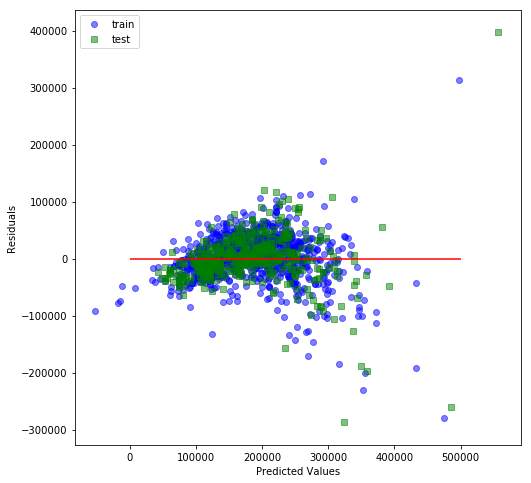

In [19]:
res_plot(B_train, lr.predict(A_train), B_test, lr.predict(A_test))

In [20]:
#変数名のlistを作成
a = list(data_train.columns)
#SalePrice要素を削除
del a[270]
#変数をそのままにする（？）
global a
#listの最後の部分を出力、SalePriceが消えていることを確認
a[265:]

['SaleType_WD',
 'Street_Grvl',
 'Street_Pave',
 'Utilities_AllPub',
 'Utilities_NoSeWa']

In [21]:
#SalePriceを抜いたDataFrameを作成
data_train_1 = pd.DataFrame(data_train, columns = a)
#SalePriceだけのDataFrameを作成
data_train_1_target = pd.DataFrame(data_train, columns = ['SalePrice'])

In [22]:
#標準化を行う
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#標準化してそれぞれを格納
A_std = sc.fit_transform(data_train_1)
B_std = sc.fit_transform(data_train_1_target)

In [23]:
#標準偏差が1にそろえられているかを確認
print(A_std.std())
print(B_std.std())

1.0
1.0


In [24]:
#標準化された値で学習を行う
lr_std = LinearRegression()
lr_std.fit(A_std, B_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#係数を出力
b = lr_std.coef_
b
#過学習を起こしているため係数が高すぎる　
#0か1で判断するものが多すぎたためだと思われる。
#特徴量が多すぎる
#0か1で表されているものも多い
b[0][4]

5686906920.4958553

In [26]:
#違うやり方で学習する
#多項式回帰を利用する
#また、抽出する特徴量を増やして実行してみる

In [34]:
corr = data_train.corr()
#相関関数の絶対値0.5以上で出力
a = corr[corr.SalePrice > 0.5]
#12個の特徴量変数が得られた
b = corr[corr.SalePrice < -0.5]
#2個の特徴量変数が得られた
#listで得られた特徴量変数名を摘出
c = list(a.index)
#SalePrice要素を削除
c.remove('SalePrice')
#変数を固定?
global c
#listからDataFrameに戻す
d = pd.DataFrame(data_train, columns = c)
#DataFrameを出力
#d.head()
e = list(b.index)
f = pd.DataFrame(data_train, columns = e)
#確認のため、fを出力
f.head()
#DataFrameを横に結合して出力
#14個の変数が得られた
g = pd.concat([d, f], axis = 1)
#確認のための出力
#g.head()
#np.array型に変換
h = np.array(g)
#SalePriceのDataFrame型を出力
i = pd.DataFrame(data_train, columns = ['SalePrice'])

j = np.array(i)
#正しく変換されていることを確認
h[:5]
j[:5]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000]], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(h, j, test_size = 0.3, random_state = 0 )


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#最初に特徴量二つでやった時より係数が平均的に小さくなっているのを確認できた
lr.coef_

array([[  7.99826554e+00,  -4.46088534e+03,   3.64517596e+01,
          1.34246313e+03,   6.03026741e+01,   1.25890164e+04,
         -1.66502893e+03,   2.55513670e+01,   2.62896745e+02,
          1.84886290e+02,   4.01167542e+04,   3.00941666e+04,
         -2.41410886e+03,  -6.31314884e+03]])

In [29]:
#数値は高くなったが過学習の度合いが大きくなっている
print('train: %.5f' % lr.score(X_train, y_train))
print('test : %.5f' % lr.score(X_test, y_test))

train: 0.83197
test : 0.72804


In [30]:
def adjusted(score, n_samples, n_features):
    adjusted = 1 - (1-score) * ((n_samples-1)/(n_samples-n_features - 1))
    return adjusted

In [31]:

print('train: %.4f' % adjusted(lr.score(X_train, y_train), len(X_train), 14))
print('test : %.4f' % adjusted(lr.score(X_test, y_test), len(X_test), 14))
#過学習が確認できた。

train: 0.8296
test : 0.7190


In [32]:
#２次の多項式にして、学習度を上げた後に過学習を調整していく
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree = 2)
Quad = quad.fit_transform(h)
Quad_train, Quad_test, y_train, y_test = train_test_split(Quad, j, test_size = 0.3, random_state = 0)


In [33]:
#学習（２次）
model_quad = LinearRegression()
model_quad.fit(Quad_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#3次の項式でも試す
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(degree = 3)
Cubic = cubic.fit_transform(h)
Cubic_train, Cubic_test, y_train, y_test = train_test_split(Cubic, j, test_size = 0.3, random_state = 0)

In [35]:
#学習（３次）
model_cubic = LinearRegression()
model_cubic.fit(Cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print('単項式（特徴量２）')
print('train: 0.7237')
print('test : 0.6888')
print('単項式（特徴量14）')
print('train: %.4f' % adjusted(lr.score(X_train, y_train), len(y_train), 14))
print('test : %.4f' % adjusted(lr.score(X_test, y_test), len(y_test), 14))
print("2次項式（特徴量14）")
print('train: %.4f' % adjusted(model_quad.score(Quad_train, y_train), len(y_train), 14))
print('test : %.4f' % adjusted(model_quad.score(Quad_test, y_test), len(y_test), 14))
print("3次項式（特徴量14）")
print('train: %.4f' % adjusted(model_cubic.score(Cubic_train, y_train), len(y_train), 14))
print('test : %.4f' % adjusted(model_cubic.score(Cubic_test, y_test), len(y_test), 14))
#単項式の特徴量14が最も良い値を出力している。しかし、単項式の特徴量2の時とあまり変わらない。
#また、単項式（特徴量14）だとtrainのデータが高くなりすぎていて、過学習を起こしている。
#これより、単項式（特徴量2）についてもう少し検証する。
#単項式（特徴量2）では係数が61と31506となっていたので標準化して試す。
#また、OverallQualだけでも試してみる。

単項式（特徴量２）
train: 0.7237
test : 0.6888
単項式（特徴量14）
train: 0.8296
test : 0.7190
2次項式（特徴量14）
train: 0.8858
test : 0.6133
3次項式（特徴量14）
train: 0.9524
test : -7426.5084


In [37]:
#一番初めのDataFrameを表示
data_train.head()
#OverallQualのみして単回帰を行う
#SalePriceとOverallQualに分けてnp型に変換
S = data_train.loc[:, ['OverallQual']].values
T = data_train.loc[:, ['SalePrice']].values

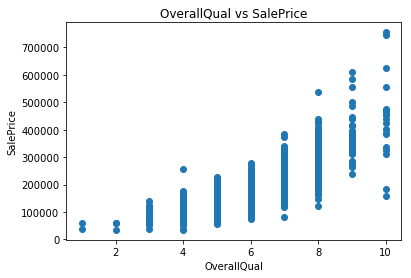

In [38]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(S,T)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(S, T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

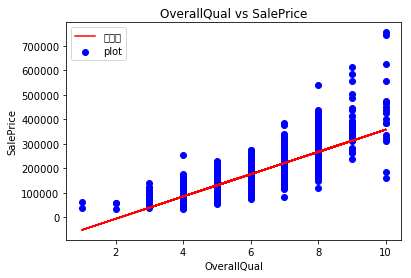

In [40]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(S, T,color = 'blue', marker = 'o' ,label='plot' )
plt.plot(S, lr.predict(S), color = 'red', label = '近似線')
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend(loc = 'upper left')

plt.show()

In [41]:
from sklearn.model_selection import train_test_split
S_train, S_test, T_train, T_test = train_test_split(S, T, test_size = 0.3, random_state = 0)

In [42]:
lr.fit(S_train, T_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr.coef_
lr.intercept_
print('train: %.3f' % adjusted(lr.score(S_train, T_train), len(y_train), 1))
print('test : %.3f' % adjusted(lr.score(S_test, T_test), len(y_test), 1))
#testデータのほうが精度が高いので過学習はないが精度そのものが低い

train: 0.615
test : 0.647


In [44]:
a = list(data_train.columns)
a.remove('SalePrice')
print(a[265:])
data_train_1 = pd.DataFrame(data_train, columns = a)
data_train_1_target = pd.DataFrame(data_train, columns = ['SalePrice'])
#標準化して出力を行う作業をすべての説明変数に対して行う
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
v = sc.fit_transform(data_train_1)
w = sc.fit_transform(data_train_1_target)

['SaleType_WD', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa']


In [45]:
v.std()
w.mean()

1.3626846987180004e-16

In [46]:
lr_std = LinearRegression()
lr_std.fit(v, w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#係数を出力させた
lr_std.coef_
#形をチェック
lr_std.coef_.ndim
#形を1次元に変換
n = np.reshape(lr_std.coef_, (270, ))


In [48]:
#pandasからSeriesをインポート
from pandas import Series
#形を1次元に変換
n = np.reshape(lr_std.coef_, (270, ))
#Seriesを使って表を作成、出力
m = Series(n, index = a)
m

1stFlrSF                 2.526130e+07
2ndFlrSF                 2.852463e+07
3SsnPorch                1.144898e-02
BedroomAbvGr            -3.457265e-02
BsmtFinSF1               5.686907e+09
BsmtFinSF2               2.011426e+09
BsmtFullBath             5.358748e-03
BsmtHalfBath            -1.624875e-03
BsmtUnfSF                5.509465e+09
EnclosedPorch            3.052592e-03
Fireplaces               2.066588e-02
FullBath                 2.512658e-02
GarageArea               4.792839e-02
GarageCars               3.822786e-02
GarageYrBlt             -6.044239e-03
GrLivArea               -3.433714e+07
HalfBath                 7.345557e-03
KitchenAbvGr            -3.547423e-02
LotArea                  9.441781e-02
LotFrontage              1.266947e-02
LowQualFinSF             3.177240e+06
MSSubClass              -1.671326e-02
MasVnrArea               4.269350e-02
MiscVal                  6.900728e-04
MoSold                  -1.472993e-02
OpenPorchSF              2.895832e-03
OverallCond 

In [49]:
#相関係数が最も高かったOverallQualとGrLivAreaで検証
#m[m>m['OverallQual']] #109個の特徴量の係数がOverallQualより大きかった。
#m[m>m['GrLivArea']] #155個の特徴量の係数がGrLivAreaより大きかった。
#係数が高い特徴量が多いが、相関係数では表れていなかった。
#過学習を起こしている？
#データを見直した結果0と1で判断されるものがとてつもなく多い。
#0か1で判断すれば係数をいくら大きくしても0なら0になるし1でもうまく組み合わされば消える。
#これによって、係数の絶対値が高くなっている。データ数に対して特徴量が多すぎる。
#0か1で判断されるものをすべて特徴量から消去してからデータの抽出を行いたいと思う。


In [98]:
#csvのデータを見たところAJ以降は全て1か0で判断される説明変数であった。
#AJまでの中で調べる(AJまでは36個の説明変数)、確認
data_train.columns[0:36]
aa = data_train.columns[0:36]
bb = pd.DataFrame(data_train, columns = aa)
cc = pd.DataFrame(data_train, columns = ['SalePrice'])
dd = np.array(bb)
ee = np.array(cc)
ee

array([[208500],
       [181500],
       [223500],
       ..., 
       [266500],
       [142125],
       [147500]], dtype=int64)

In [101]:
from sklearn.model_selection import train_test_split
dd_train, dd_test, ee_train, ee_test = train_test_split(dd, ee, test_size = 0, random_state = 0)

In [113]:
from sklearn.linear_model import LinearRegression
ld = LinearRegression()
ld.fit(dd_train, ee_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
ld.score(dd_train, ee_train)

0.8138697328035237

In [116]:
ld.score(dd_test, ee_test)
#?

ValueError: Found array with 0 sample(s) (shape=(0, 36)) while a minimum of 1 is required.

In [119]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_sd = sd.fit_transform(bb)
y_sd = sd.fit_transform(cc)

In [122]:
X_sd.mean()
X_sd.std()

1.0

In [124]:
y_sd.mean()
y_sd.std()

0.99999999999999978

In [136]:
X_sd_train, X_sd_test, y_sd_train, y_sd_test = train_test_split(X_sd, y_sd, test_size = 0.3, random_state = 0)

In [179]:
lr_sd = LinearRegression()
lr_sd.fit(X_sd_train, y_sd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
print(lr_sd.intercept_)

[ 0.00158423]


In [178]:
lr_sd.coef_
#16個目と28個目が高くなっていることがわかるがこれはGrLivAreaとOverallQualである。


AttributeError: 'PolynomialFeatures' object has no attribute 'coef_'

In [140]:
lr_sd.score(X_sd_train, y_sd_train)

0.84289699348262137

In [141]:
lr_sd.score(X_sd_test, y_sd_test)
#変数が多すぎた
#過学習を起こしているので、係数が高いものだけ抽出する

0.71983443361643151

In [145]:
ff = pd.concat([bb,cc], axis = 1)
gg = ff.corr()

In [155]:
gg[gg.SalePrice>0.6] #[1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2,BsmtFullBath]
#gg[gg.SalePrice<-0.6] #何もなかった
#6つの変数が得られた
#list型に格納する
hh = pd.DataFrame(data_train, columns = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath'])

In [157]:
ii = np.array(hh)

In [162]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
hh_se = se.fit_transform(hh)
cc_se = se.fit_transform(cc)

In [164]:
hh_se_train, hh_se_test, cc_se_train, cc_se_test = train_test_split(hh_se, cc_se, test_size = 0.3, random_state= 0)

In [165]:
from sklearn.linear_model import LinearRegression
lse = LinearRegression()
lse.fit(hh_se_train, cc_se_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
lse.coef_

array([[ 0.70156439,  0.58678959,  0.01829633, -0.186612  ,  0.1642175 ,
        -0.01409143,  0.04463035]])

In [167]:
lse.intercept_

array([-0.00541554])

In [169]:
lse.score(hh_se_train, cc_se_train)

0.66172077148773401

In [170]:
lse.score(hh_se_test, cc_se_test)

0.52751856584875112

In [185]:
print('train: %.4f' % lr_sd.score(X_sd_train, y_sd_train))
print('test : %.4f' % lr_sd.score(X_sd_test, y_sd_test))

train: 0.8429
test : 0.7198


In [202]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 1000)
model_ridge.fit(X_sd_train, y_sd_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [203]:
model_ridge.coef_

array([[ 0.08235124,  0.05819989,  0.00839024, -0.01241883,  0.06571296,
         0.00085688,  0.0336028 ,  0.00276979,  0.01647   ,  0.00062525,
         0.06165308,  0.05986528,  0.07111328,  0.06631032,  0.04231546,
         0.1092149 ,  0.02907611, -0.0400729 ,  0.04006519,  0.03766166,
         0.00305204, -0.02650932,  0.07052235, -0.0005735 , -0.00211199,
         0.02639251,  0.0276635 ,  0.14092344,  0.00761684,  0.01582019,
         0.07006267,  0.08522198,  0.0353525 ,  0.05581754,  0.06406626,
        -0.00573425]])

In [204]:
model_ridge.intercept_

array([-0.00188824])

In [205]:
model_ridge.score(X_sd_train, y_sd_train)

0.80946477980903819

In [206]:
model_ridge.score(X_sd_test, y_sd_test)

0.72129994146676779

In [213]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 100)
model_lasso.fit(X_sd_train, y_sd_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [214]:
model_lasso.intercept_

array([-0.00421791])

In [215]:
model_lasso.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.])

In [216]:
model_lasso.score(X_sd_train, y_sd_train)

0.0

In [217]:
model_lasso.score(X_sd_test, y_sd_test)

-0.00018363526626030691

In [30]:
data_train = pd.read_csv('House Price train.csv')
data_test = pd.read_csv('House Price test.csv')
cor = data_train.corr()
#確認
#cor.head() 


In [33]:
b = cor[cor.SalePrice > 0.6]
b #1stFlrSF, GarageCars, GrLivArea, OverallQual, TotalBsmtSFが得られた
c = cor[cor.SalePrice <-0.6]
c #なし
d = list(b.index)
d

['1stFlrSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'SalePrice']

In [44]:
e = pd.DataFrame(data_train, columns = ['1stFlrSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'TotalBsmtSF'])
#確認
e.head()
f = np.array(e)
f.shape

(1460, 6)

In [58]:
data_train = pd.read_csv('House Price Mapping train.csv')
data_test = pd.read_csv('House Price Mapping test.csv')
print(data_train.shape)
print(data_test.shape)
data_train.corr()

(1460, 24)
(1459, 23)


,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
MSSubClass,1.000000,0.532233,0.471136,0.572252,0.415910,0.246813,0.212010,0.393934,0.445768,0.423389,...,0.329673,0.391700,0.253413,0.283353,0.510706,0.408647,0.438262,0.397369,0.387789,0.476982
Neighborhood,0.532233,1.000000,0.667647,0.683095,0.521638,0.400196,0.368029,0.631870,0.576118,0.629227,...,0.513701,0.566358,0.282979,0.315569,0.456575,0.579489,0.466576,0.585252,0.529629,0.696882
OverallQual,0.471136,0.667647,1.000000,0.665203,0.552825,0.449358,0.410238,0.726278,0.568969,0.644946,...,0.552153,0.673331,0.423438,0.396765,0.420713,0.574261,0.491404,0.628715,0.562022,0.790982
YearBuilt,0.572252,0.683095,0.665203,1.000000,0.652419,0.420443,0.298983,0.638206,0.699337,0.707715,...,0.555510,0.575836,0.246057,0.214032,0.519992,0.768672,0.554784,0.570728,0.523139,0.619545
YearRemodAdd,0.415910,0.521638,0.552825,0.652419,1.000000,0.310870,0.193044,0.570870,0.551916,0.545541,...,0.452501,0.611669,0.217923,0.162493,0.387933,0.617250,0.446760,0.433995,0.390554,0.535370
MasVnrType,0.246813,0.400196,0.449358,0.420443,0.310870,1.000000,0.579165,0.415825,0.310319,0.393052,...,0.305025,0.362377,0.194912,0.199416,0.315218,0.343755,0.323321,0.429343,0.380290,0.426997
MasVnrArea,0.212010,0.368029,0.410238,0.298983,0.193044,0.579165,1.000000,0.349637,0.209916,0.314065,...,0.266274,0.285190,0.280041,0.247906,0.221484,0.229848,0.251678,0.404375,0.372567,0.475241
ExterQual,0.393934,0.631870,0.726278,0.638206,0.570870,0.415825,0.349637,1.000000,0.597832,0.638241,...,0.497192,0.716122,0.308004,0.249335,0.378696,0.590883,0.482143,0.557218,0.495778,0.682639
Foundation,0.445768,0.576118,0.568969,0.699337,0.551916,0.310319,0.209916,0.597832,1.000000,0.621976,...,0.462312,0.533146,0.180213,0.113338,0.401139,0.644742,0.487728,0.458128,0.398155,0.505503
BsmtQual,0.423389,0.629227,0.644946,0.707715,0.545541,0.393052,0.314065,0.638241,0.621976,1.000000,...,0.523471,0.562345,0.238832,0.227714,0.424760,0.642954,0.525068,0.545306,0.458693,0.635361


In [ ]:
#一番最初